In [2]:
import pandas as pd

# Carica il file CSV in un DataFrame
df = pd.read_csv('train.csv')

# Visualizza le prime 5 righe del DataFrame
print(df.head())

# Visualizza informazioni sul DataFrame (colonne, tipi di dato, valori non nulli)
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [3]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\net.SIS-03\AppData\Local\Temp\ipykernel_16608\286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [6]:
df.fillna({'Age': df['Age'].median()}, inplace=True)

In [7]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Partner, Mr. Austen'

In [10]:
X_train.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Copia di sicurezza
data = df.copy()

# 1️⃣ Elimina colonne non utili o testuali
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# 2️⃣ Converti la colonna 'Sex' in numerico (se non già fatto)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# 3️⃣ Gestisci i valori mancanti di 'Embarked'
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# 4️⃣ One-hot encoding per 'Embarked'
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')

# 🔍 Verifica che tutto ora sia numerico
print(data.dtypes)

Survived        int64
Pclass          int64
Sex           float64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_C       bool
Embarked_Q       bool
Embarked_S       bool
dtype: object


C:\Users\net.SIS-03\AppData\Local\Temp\ipykernel_16608\1552007740.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)


In [12]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

KeyError: 'Embarked'

In [13]:
print(data.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Separazione feature (X) e target (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# ✅ Divisione train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Creazione e addestramento del modello
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Predizione
y_pred = model.predict(X_test)

# ✅ Valutazione del modello
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

🎯 Accuracy: 0.7318435754189944

Confusion Matrix:
 [[86 19]
 [29 45]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       105
           1       0.70      0.61      0.65        74

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.73      0.73      0.73       179



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns  # opzionale ma più bello graficamente

# Imposta uno stile grafico più moderno
sns.set(style="whitegrid")

# Se hai già il DataFrame pulito (df o data)
df = data.copy()

Matplotlib is building the font cache; this may take a moment.


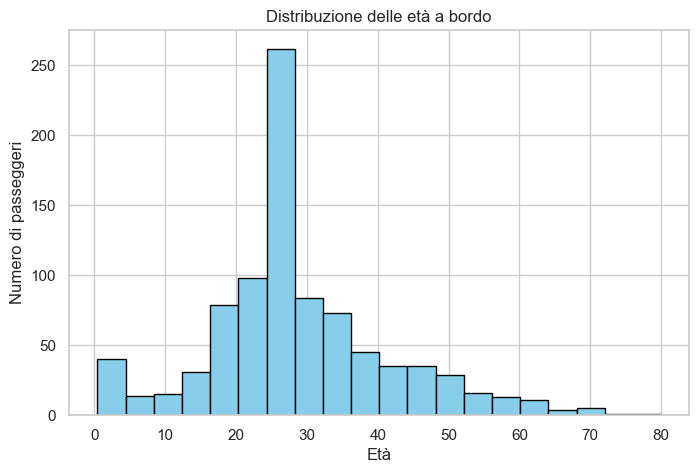

In [16]:
plt.figure(figsize=(8,5))
df["Age"].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Età")
plt.ylabel("Numero di passeggeri")
plt.title("Distribuzione delle età a bordo")
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

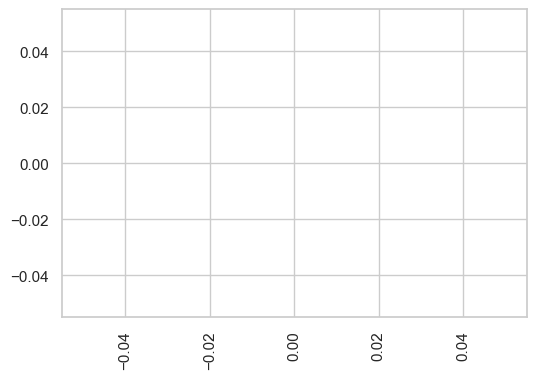

In [17]:
plt.figure(figsize=(6,4))
df.groupby("Sex")["Survived"].mean().plot(kind="bar", color=['lightcoral', 'lightblue'])
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

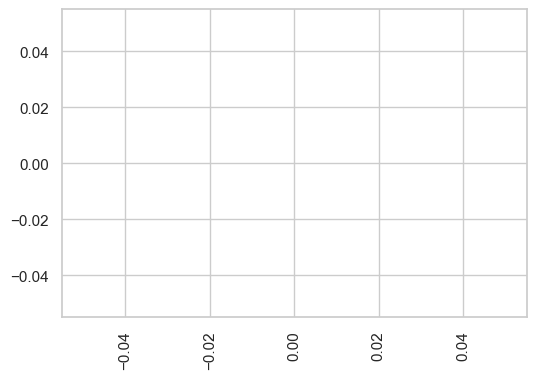

In [18]:
plt.figure(figsize=(6,4))
df.groupby("Sex")["Survived"].mean().plot(kind="bar", color=['lightcoral', 'lightblue'])
plt.xticks([0,1], ['male','female'], rotation=0)  # etichette leggibili
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.show()


In [19]:
print(df.columns)

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


IndexError: index 0 is out of bounds for axis 0 with size 0

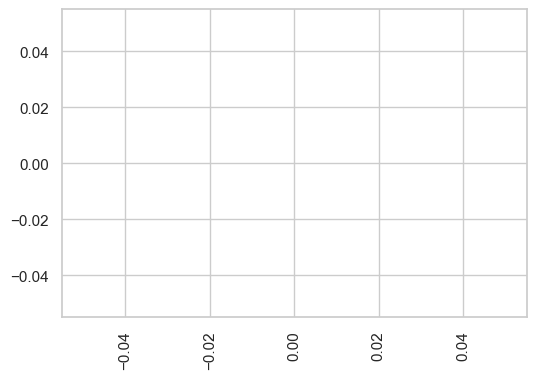

In [20]:
# Creiamo una colonna testuale leggibile per i grafici
df['Sex_text'] = df['Sex'].map({0: 'male', 1: 'female'})

plt.figure(figsize=(6,4))
df.groupby('Sex_text')['Survived'].mean().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.show()

In [21]:
df['Sex'].unique()


array([nan])

In [22]:
df['Survived'].value_counts(dropna=False)

Survived
0    549
1    342
Name: count, dtype: int64

Series([], Name: Survived, dtype: float64)


IndexError: index 0 is out of bounds for axis 0 with size 0

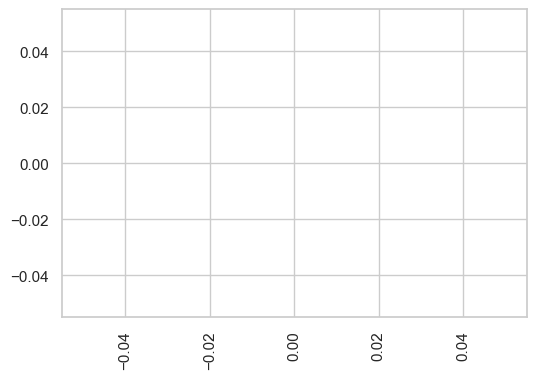

In [23]:
# Mappiamo la colonna Sex in valori testuali (se ancora non fatto)
df['Sex_text'] = df['Sex'].map({0: 'male', 1: 'female'})

# Controlliamo i valori presenti
print(df.groupby('Sex_text')['Survived'].mean())

# Creiamo il grafico
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
df.groupby('Sex_text')['Survived'].mean().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.show()

In [24]:
# Controlla i valori della colonna Sex_text
print(df['Sex_text'].value_counts(dropna=False))

# Controlla i valori della colonna Survived
print(df['Survived'].value_counts(dropna=False))

# Controlla le prime righe del DataFrame
print(df.head())

Sex_text
NaN    891
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3  NaN  22.0      1      0   7.2500       False       False   
1         1       1  NaN  38.0      1      0  71.2833        True       False   
2         1       3  NaN  26.0      0      0   7.9250       False       False   
3         1       1  NaN  35.0      1      0  53.1000       False       False   
4         0       3  NaN  35.0      0      0   8.0500       False       False   

   Embarked_S Sex_text  
0        True      NaN  
1       False      NaN  
2        True      NaN  
3        True      NaN  
4        True      NaN  


In [25]:
df = pd.read_csv('titanic.csv')
print(df['Sex'].value_counts())


FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [26]:
df = pd.read_csv('titanic.csv')
print(df['Sex'].value_counts())

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file corretto
df = pd.read_csv(r'path\to\gender_submission.csv')  # usa il percorso corretto

# Controlla le colonne
print(df.columns)
print(df.head())

# Se la colonna del sesso non è presente, dobbiamo crearla o usarla da un altro file
# Supponiamo che la colonna si chiami 'Sex' o 'Gender'
if 'Sex' in df.columns:
    df['Sex_text'] = df['Sex']
elif 'Gender' in df.columns:
    df['Sex_text'] = df['Gender']
else:
    print("Il file non contiene informazioni sul sesso dei passeggeri.")

# Grafico sopravvivenza per sesso
plt.figure(figsize=(6,4))
df.groupby('Sex_text')['Survived'].mean().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path\\to\\gender_submission.csv'

In [28]:
df = pd.read_csv('gender_submission.csv')

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file corretto
df = pd.read_csv(r'path\to\gender_submission.csv')  # usa il percorso corretto

# Controlla le colonne
print(df.columns)
print(df.head())

# Se la colonna del sesso non è presente, dobbiamo crearla o usarla da un altro file
# Supponiamo che la colonna si chiami 'Sex' o 'Gender'
if 'Sex' in df.columns:
    df['Sex_text'] = df['Sex']
elif 'Gender' in df.columns:
    df['Sex_text'] = df['Gender']
else:
    print("Il file non contiene informazioni sul sesso dei passeggeri.")

# Grafico sopravvivenza per sesso
plt.figure(figsize=(6,4))
df.groupby('Sex_text')['Survived'].mean().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path\\to\\gender_submission.csv'

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Se

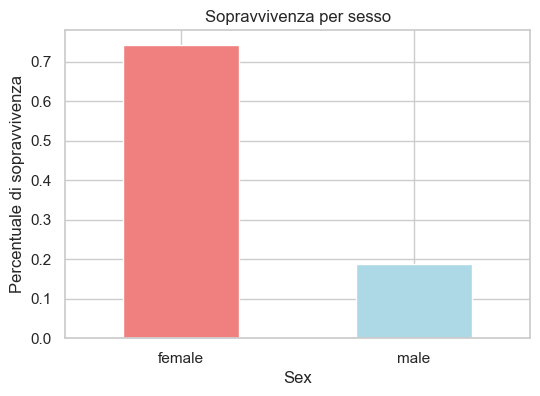

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica i dati
df = pd.read_csv('train.csv')

# Controlla le prime righe per capire i nomi delle colonne
print(df.head())

# Mappa la colonna 'Sex' in numeri o lascia testo
# In questo caso possiamo usarla direttamente
# Raggruppa per sesso e calcola la percentuale di sopravvivenza
survival_by_sex = df.groupby('Sex')['Survived'].mean()

# Stampa i risultati
print(survival_by_sex)

# Grafico
plt.figure(figsize=(6,4))
survival_by_sex.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.ylabel("Percentuale di sopravvivenza")
plt.title("Sopravvivenza per sesso")
plt.xticks(rotation=0)  # rendi le etichette leggibili
plt.show()


In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Encoding Sex
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Encoding Embarked (One-hot)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Fill missing Age con la mediana
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\net.SIS-03\AppData\Local\Temp\ipykernel_19172\3194195056.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [4]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked_Q", "Embarked_S"]
X = df[features]
y = df["Survived"]

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Accuracy: 0.8100558659217877


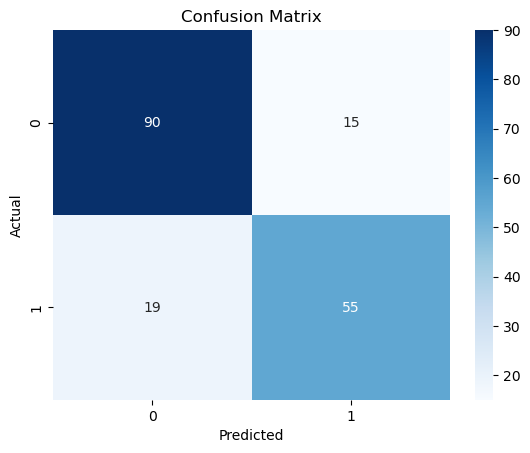

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [8]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

      Feature  Coefficient
1         Sex     2.588809
5        Fare     0.002544
2         Age    -0.030638
4       Parch    -0.107434
6  Embarked_Q    -0.122096
3       SibSp    -0.294470
7  Embarked_S    -0.413242
0      Pclass    -0.937031


In [9]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_predictions))

Decision Tree Accuracy: 0.7988826815642458
